<a href="https://colab.research.google.com/github/Mayank-Patel-9/Machine-Learning/blob/main/(1)MSPA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# Load the dataset (Assuming the dataset is in CSV format)
data = pd.read_csv('wine-clustering.csv')

# Check for missing values
print(data.isnull().sum())

# Handle missing values (if any)
# For simplicity, we will drop rows with missing values (or use imputation if needed)
data = data.dropna()

# Selecting relevant columns (assuming the dataset has 'Alcohol', 'Magnesium', 'Total_Phenols' columns)
X = data[['Alcohol', 'Magnesium', 'Total_Phenols']]

# Standardizing the data (important for K-Means clustering)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Data after scaling: \n", X_scaled[:5])

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64
Data after scaling: 
 [[1.51861254 1.91390522 0.80899739]
 [0.24628963 0.01814502 0.56864766]
 [0.19687903 0.08835836 0.80899739]
 [1.69154964 0.93091845 2.49144552]
 [0.29570023 1.28198515 0.80899739]]


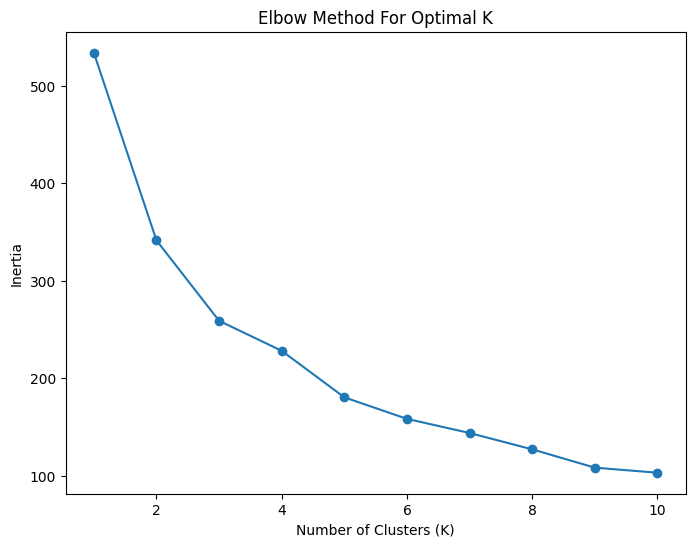

In [6]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN

# Calculate inertia (within-cluster sum of squares) for different K values
inertia = []
K_range = range(1, 11)  # Test for K from 1 to 10
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.figure(figsize=(8, 6))
plt.plot(K_range, inertia, marker='o')
plt.title('Elbow Method For Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.show()

In [17]:
# Apply K-Means with the chosen number of clusters (let's assume K=5)
kmeans = KMeans(n_clusters=5, random_state=42)
y_kmeans = kmeans.fit_predict(X_scaled)

# Add the cluster labels to the original data
data['Cluster'] = y_kmeans

print(data.head())

   Alcohol  Malic_Acid   Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
0    14.23        1.71  2.43          15.6        127           2.80   
1    13.20        1.78  2.14          11.2        100           2.65   
2    13.16        2.36  2.67          18.6        101           2.80   
3    14.37        1.95  2.50          16.8        113           3.85   
4    13.24        2.59  2.87          21.0        118           2.80   

   Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity   Hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   OD280  Proline  Cluster  
0   3.92     1065        2  
1   3.40     1050        0  
2   3

<Figure size 800x600 with 0 Axes>

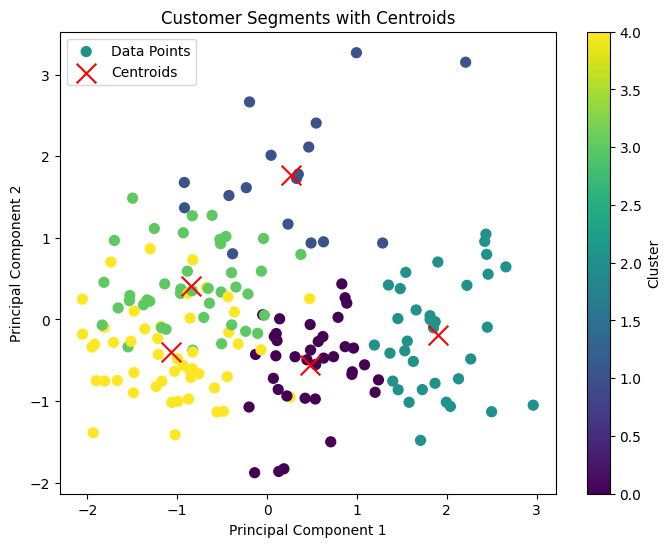

In [18]:
# Visualize the clusters in 2D space
plt.figure(figsize=(8, 6))

# Use PCA to reduce the data to 2D
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plot the clusters
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_kmeans, cmap='viridis', s=50, label='Data Points')

# Plot the centroids
centroids_pca = pca.transform(kmeans.cluster_centers_)  # Transform cluster centers to PCA space
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], s=200, c='red', marker='x', label='Centroids')

# Adding labels and title
plt.title('Customer Segments with Centroids')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()

# Show the plot
plt.colorbar(scatter, label='Cluster')
plt.show()

# X-axis: This represents the first principal component (PC1), which is the linear combination of the
# original features ('Alcohol', 'Magnesium', 'Total_Phenols' that explains the most variance.
# Y-axis: This represents the second principal component (PC2), which is orthogonal to PC1 and
# explains the next largest amount of variance in the data.

In [19]:
# Display the cluster centers (mean of the features for each cluster)
print("Cluster Centers (Age, Annual Income, Spending Score):")
print(kmeans.cluster_centers_)

Cluster Centers (Age, Annual Income, Spending Score):
[[ 0.45895551 -0.20767626  0.55955335]
 [-0.29068732  1.62066127 -0.80275963]
 [ 1.21161287  0.88961648  1.18601658]
 [ 0.09233343 -0.43567291 -1.15952553]
 [-1.1636771  -0.65819573  0.00325353]]


In [20]:
# You can also explore the characteristics of each cluster:
for i in range(5):
    print(f"Cluster {i} Summary:")
    print(data[data['Cluster'] == i].describe())

Cluster 0 Summary:
         Alcohol  Malic_Acid        Ash  Ash_Alcanity   Magnesium  \
count  37.000000   37.000000  37.000000     37.000000   37.000000   
mean   13.372162    2.075405   2.384865     18.140541   96.783784   
std     0.465601    1.064027   0.266360      3.134969    7.230856   
min    12.370000    0.940000   1.700000     11.200000   78.000000   
25%    13.050000    1.510000   2.140000     16.100000   93.000000   
50%    13.340000    1.730000   2.400000     17.500000   96.000000   
75%    13.710000    1.870000   2.620000     19.000000  101.000000   
max    14.390000    5.800000   2.840000     25.000000  110.000000   

       Total_Phenols  Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  \
count      37.000000   37.000000             37.000000        37.000000   
mean        2.644324    2.573784              0.308378         1.739189   
std         0.323415    0.688042              0.096336         0.505285   
min         2.050000    0.600000              0.170000     